# Safe Water prediction

In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import math

In [2]:
# read the dataset 

df = pd.read_csv('waterquality1.csv')
print(df.shape)
df.head()

(7999, 21)


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


# Data Preprocessing
#### Data Cleansing  & Observation

In [3]:
df.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,...,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,14.273628,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,...,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673,0.114014
std,1.265145,8.880513,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,...,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904,0.317848
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.560000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.130000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


In [4]:
df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [5]:
#df.fillna(df.mean(), inplace = True)
#df.dropna(inplace=True)

In [6]:
print(df.shape)
df.head()

(7999, 21)


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [33]:
#Converted into int and rounded up.
#for cols in df.columns:
    #df[cols] = df[cols].round(0).astype('int')

In [7]:
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [8]:
#unique value
for cols in df.columns:
    unique_values = df[cols].unique()
    print("Feature ", cols, " has ", len(unique_values), " unique values")

Feature  aluminium  has  495  unique values
Feature  ammonia  has  2563  unique values
Feature  arsenic  has  107  unique values
Feature  barium  has  480  unique values
Feature  cadmium  has  23  unique values
Feature  chloramine  has  812  unique values
Feature  chromium  has  91  unique values
Feature  copper  has  201  unique values
Feature  flouride  has  151  unique values
Feature  bacteria  has  101  unique values
Feature  viruses  has  61  unique values
Feature  lead  has  200  unique values
Feature  nitrates  has  1803  unique values
Feature  nitrites  has  280  unique values
Feature  mercury  has  11  unique values
Feature  perchlorate  has  2999  unique values
Feature  radium  has  735  unique values
Feature  selenium  has  11  unique values
Feature  silver  has  51  unique values
Feature  uranium  has  10  unique values
Feature  is_safe  has  2  unique values


## Exploratory Data Analysis

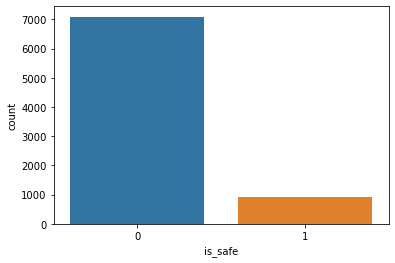

In [9]:
#Checking imbalance 
sns.countplot(df['is_safe'])
plt.show()

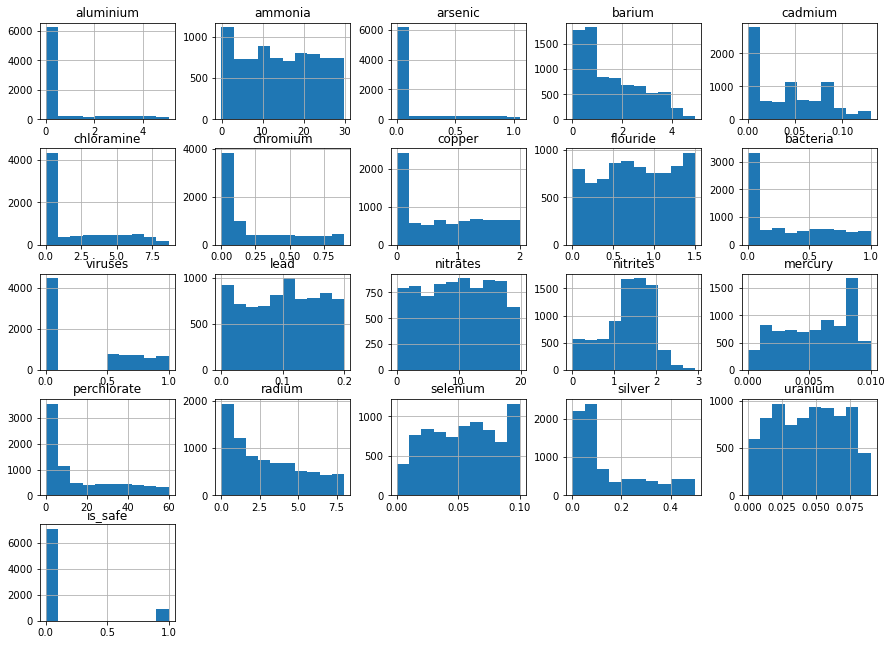

In [10]:
df.hist(figsize=(15,11))
plt.show()

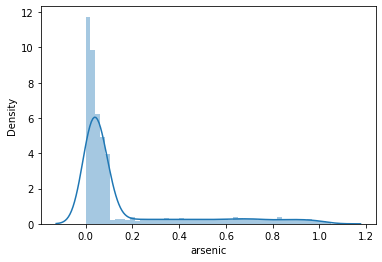

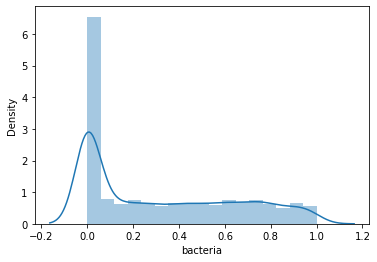

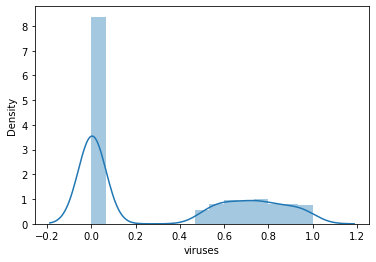

In [11]:
sns.distplot(df['arsenic'])
plt.show()
sns.distplot(df['bacteria'])
plt.show()
sns.distplot(df['viruses'])
plt.show()

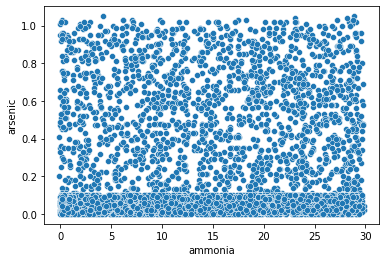

In [12]:
sns.scatterplot(df['ammonia'],df['arsenic'])
plt.show()

In [11]:
#sns.scatterplot(df['ph'],df['Solids'])
#plt.show()

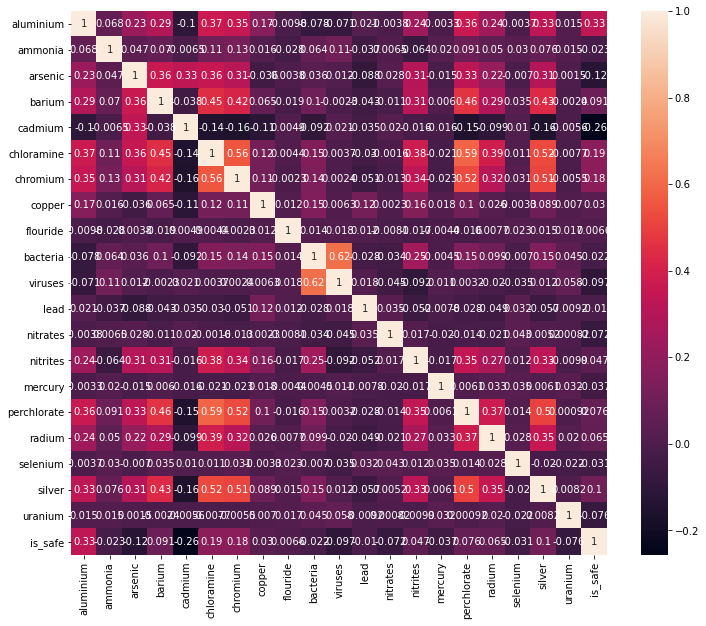

In [13]:
corr = df.corr()
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True);
#no correlation between features so we cant reduce any of them

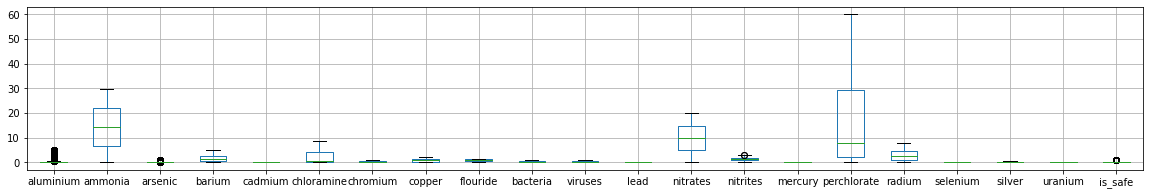

In [14]:
df.boxplot(figsize = (20,3))
plt.show()

In [15]:
from sklearn.preprocessing import MinMaxScaler

df_norm = df.copy()

# apply normalization techniques
column1 = 'perchlorate'
column2 = 'ammonia'
column3 = 'nitrates'
column4 = 'chloramine'
df_norm[column1] = MinMaxScaler().fit_transform(np.array(df_norm[column1]).reshape(-1,1))
df_norm[column2] = MinMaxScaler().fit_transform(np.array(df_norm[column2]).reshape(-1,1))
df_norm[column3] = MinMaxScaler().fit_transform(np.array(df_norm[column3]).reshape(-1,1))
df_norm[column4] = MinMaxScaler().fit_transform(np.array(df_norm[column4]).reshape(-1,1))
# view normalized data
display(df_norm)


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,0.306150,0.04,2.85,0.007,0.040323,0.83,0.17,0.05,0.20,...,0.054,0.810893,1.13,0.007,0.629062,6.78,0.08,0.34,0.02,1
1,2.32,0.709893,0.01,3.31,0.002,0.608295,0.68,0.66,0.90,0.65,...,0.100,0.101362,1.93,0.003,0.537577,3.21,0.08,0.27,0.05,1
2,1.01,0.471257,0.04,0.58,0.008,0.488479,0.53,0.02,0.99,0.05,...,0.078,0.714070,1.11,0.006,0.837860,7.07,0.07,0.44,0.01,0
3,1.36,0.381350,0.04,2.96,0.001,0.832949,0.03,1.66,1.08,0.71,...,0.016,0.071104,1.29,0.004,0.151975,1.72,0.02,0.45,0.05,1
4,0.92,0.815842,0.03,0.20,0.006,0.307604,0.69,0.57,0.61,0.13,...,0.117,0.339889,1.11,0.003,0.281620,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,0.262701,0.00,1.95,0.040,0.011521,0.03,0.03,1.37,0.00,...,0.197,0.720625,1.00,0.005,0.059490,2.13,0.09,0.06,0.03,1
7995,0.05,0.812166,0.02,0.59,0.010,0.051843,0.02,0.02,1.48,0.00,...,0.031,0.517902,1.00,0.001,0.024663,1.11,0.09,0.10,0.08,1
7996,0.09,0.231618,0.00,0.61,0.030,0.005760,0.05,0.02,0.91,0.00,...,0.182,0.802824,1.00,0.000,0.022496,4.84,0.00,0.04,0.05,1
7997,0.01,0.336898,0.01,2.00,0.000,0.230415,0.00,0.09,0.00,0.00,...,0.000,0.000000,0.00,0.000,0.000000,0.00,0.00,0.00,0.00,1


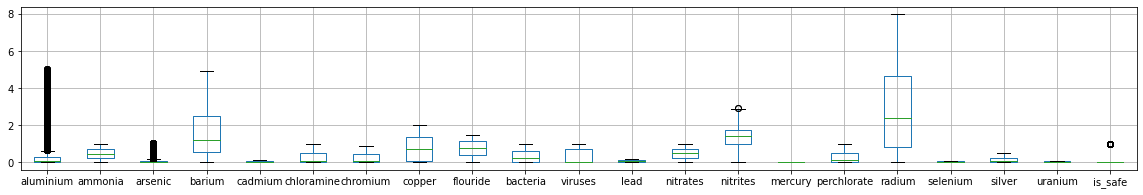

In [16]:
df_norm.boxplot(figsize = (20,3))
plt.show()

## Data Splitting

### Holdout Validation Approach

In [17]:
X = df_norm.drop(columns= 'is_safe')  #x contain the input data
Y = df_norm['is_safe']                #y contain the target data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.3, random_state=20)


In [18]:
print(X_train.shape)
print(X_test.shape)

(5599, 20)
(2400, 20)


### K Fold Cross Validation

In [19]:
from sklearn.model_selection import KFold, cross_val_score

kfold_validation = KFold(n_splits = 14)

### Stratified k Fold Cross Validation

In [20]:
# For imbalance dataset
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=7)

## Model Creation & Evaluation

#### ZeroR Classifier

In [21]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
clf = DummyClassifier(strategy = "most_frequent")
clf.fit(X_train, Y_train)
Y_pred_train = clf.predict(X_train)
Y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(Y_pred_train, Y_train))
print("Test Accuracy: ", accuracy_score(Y_pred_test, Y_test))

Train Accuracy:  0.8835506340417931
Test Accuracy:  0.8916666666666667


#### Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix

In [23]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [24]:
Y_predict = clf.predict(X_test)

In [25]:
accuracy_score(Y_predict, Y_test)

0.95375

In [26]:
print("Accuracy on training set: {:.3f}".format(clf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.954


In [27]:
#For K fold
results = cross_val_score(clf, X, Y, cv = kfold_validation)
print(results)
print()
print ("Results = ", np.mean(results), "+/-", np.std(results))

[0.8479021  0.86888112 0.95629371 0.93531469 0.87237762 0.98073555
 0.95971979 0.91593695 0.93345009 0.96322242 0.99124343 0.99649737
 1.         0.79859895]

Results =  0.9300124131560208 +/- 0.059537012838899


In [28]:
#For Stratified K Fold validation
results = cross_val_score(clf, X, Y, cv = skfold)
print(results)
print()
print ("Results = ", np.mean(results), "+/-", np.std(results))

[0.55293088 0.90463692 0.9720035  0.88538933 0.93088364 0.90105079
 0.882662  ]

Results =  0.8613652934363941 +/- 0.12910874383907842


#### KNN with Euclidean Distance 

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.8204166666666667 , Difference =  17.958333333333332 %
K =  5 , Training Accuracy =  0.9165922486158242  Test Accuracy =  0.88 , Difference =  3.659224861582422 %
K =  10 , Training Accuracy =  0.8990891230576888  Test Accuracy =  0.89125 , Difference =  0.7839123057688857 %
K =  15 , Training Accuracy =  0.8967672798714056  Test Accuracy =  0.8904166666666666 , Difference =  0.6350613204738953 %
K =  20 , Training Accuracy =  0.8908733702446866  Test Accuracy =  0.8979166666666667 , Difference =  0.7043296421980094 %
K =  25 , Training Accuracy =  0.8923021968208609  Test Accuracy =  0.8991666666666667 , Difference =  0.6864469845805798 %


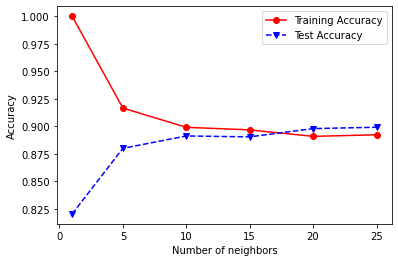

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
numNeighbors = [1, 5, 10, 15, 20, 25]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

In [43]:
# for the SVC classifier
from sklearn import metrics
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(Y_test, Y_pred_test))
print()
print("Classification Report")
print(metrics.classification_report(Y_test, Y_pred_test, digits = 3))

Confusion Matrix for the Test Case
[[2140    0]
 [ 260    0]]

Classification Report
              precision    recall  f1-score   support

           0      0.892     1.000     0.943      2140
           1      0.000     0.000     0.000       260

    accuracy                          0.892      2400
   macro avg      0.446     0.500     0.471      2400
weighted avg      0.795     0.892     0.841      2400



### SVC 

In [44]:
from sklearn.svm import SVC

In [45]:
model = SVC()

In [46]:
model.fit(X_train,Y_train)

SVC()

In [32]:
model.score(X_test,Y_test)


NameError: name 'model' is not defined

### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier()
rclf.fit(X_train,Y_train)

RandomForestClassifier()

In [33]:

results = cross_val_score(rclf, X, Y, cv = skfold)
print(results)
print()
print ("Results = ", np.mean(results), "+/-", np.std(results))

[0.62729659 0.91951006 0.97287839 0.93350831 0.96500437 0.88791594
 0.89141856]

Results =  0.8853617465942852 +/- 0.10962738528112591


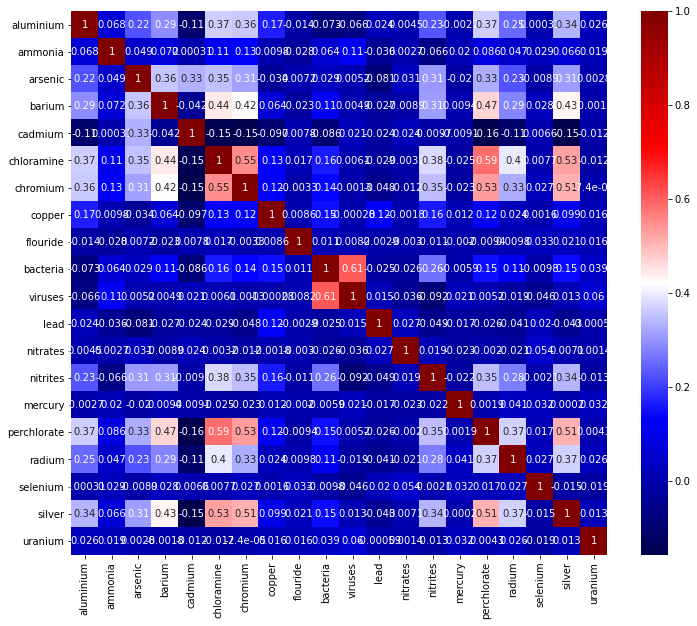

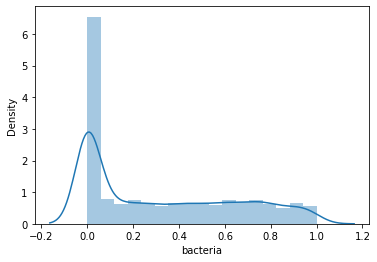